In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
Cancer_data = pd.read_csv("C:/Users/swapn/Downloads/data (1).csv")
Cancer_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


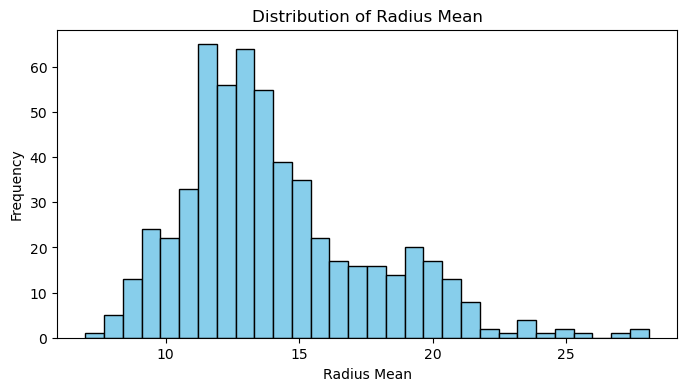

In [3]:
plt.figure(figsize=(8, 4))
plt.hist(Cancer_data['radius_mean'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

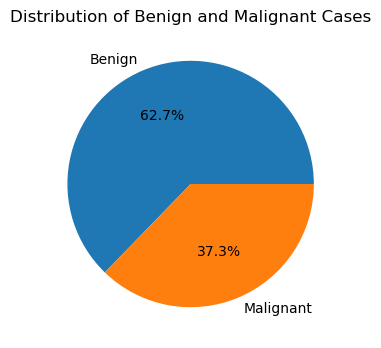

In [4]:
count = Cancer_data['diagnosis'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(count, labels=['Benign', 'Malignant'], autopct='%1.1f%%')
plt.title('Distribution of Benign and Malignant Cases')
plt.show()

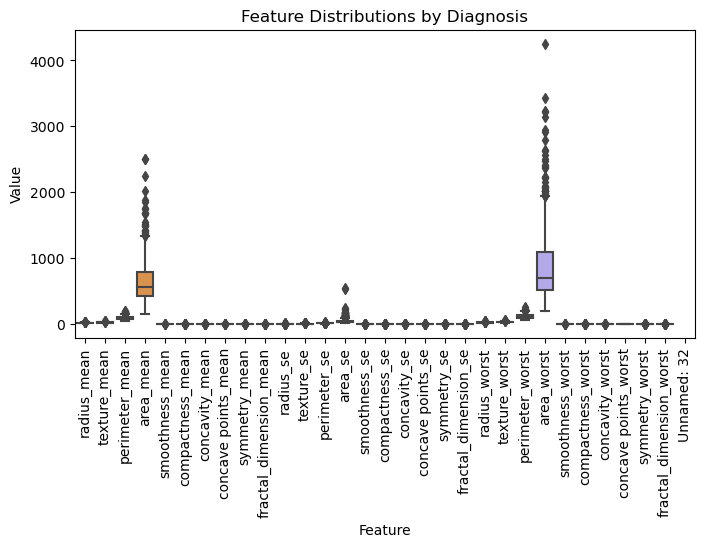

In [5]:
features = Cancer_data.drop(['id', 'diagnosis'], axis=1)
plt.figure(figsize=(8, 4))
sns.boxplot(x='variable', y='value', data=pd.melt(features))
plt.title('Feature Distributions by Diagnosis')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

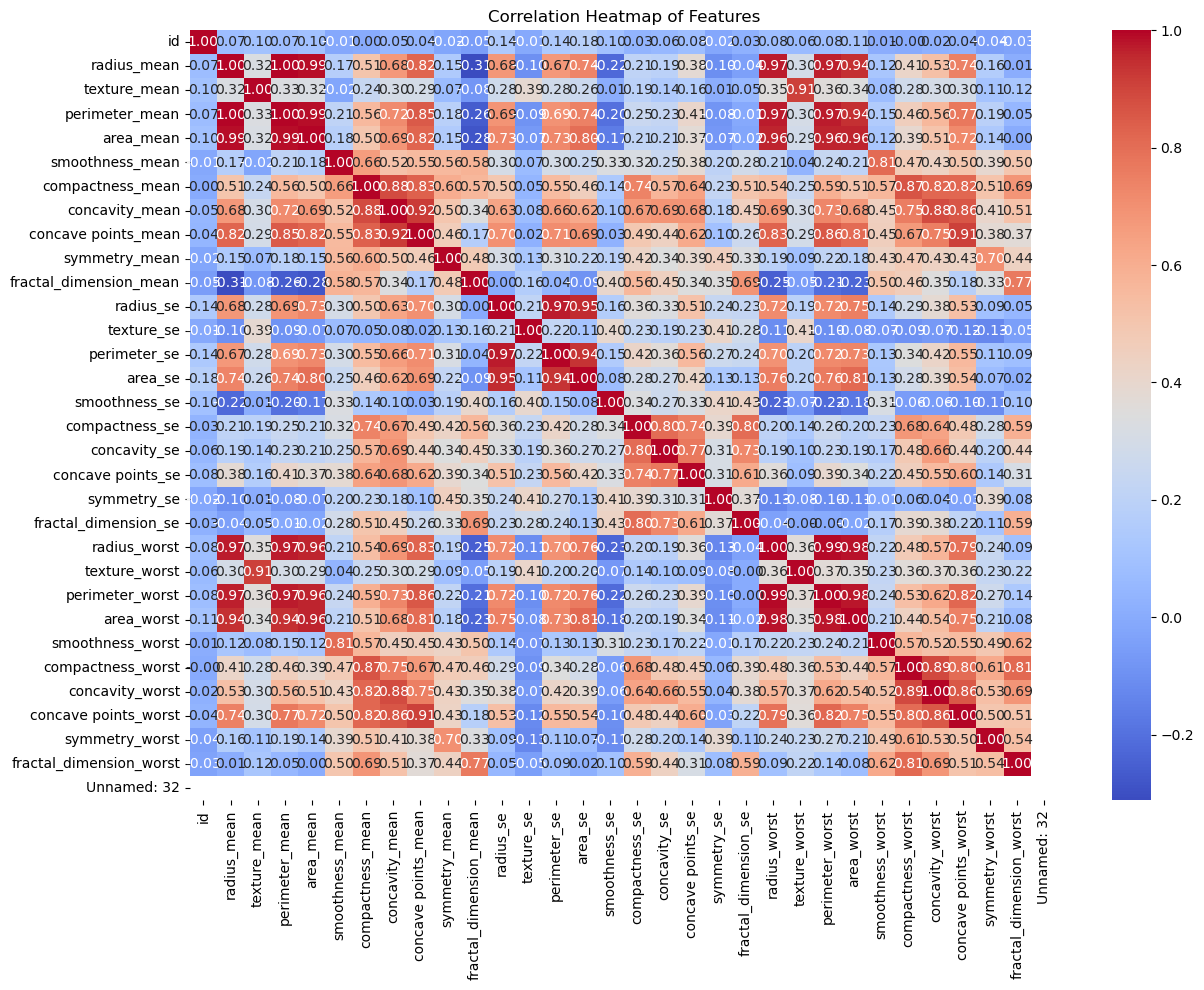

In [6]:
correlation_matrix = Cancer_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values
# The 'Unnamed: 32' column contains NaN values, so we drop it
# Also, the 'id' column is not needed for the model, so we drop it
ndata = Cancer_data.drop(['Unnamed: 32', 'id'], axis=1)

# Encode the 'diagnosis' column
le = LabelEncoder()
ndata['diagnosis'] = le.fit_transform(ndata['diagnosis'])

# Split the data into features (X) and target (y)
X = ndata.drop('diagnosis', axis=1)
y = ndata['diagnosis']

# Display the first few rows of the processed data
X.head(), y.head()

(   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst 

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
len(X_train), len(X_test)

(455, 114)

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
len(X_train), len(X_test)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Train a Support Vector Machine (SVM) model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)

# Calculate the precision of the models
svm_precision = precision_score(y_test, svm_preds)
rf_precision = precision_score(y_test, rf_preds)

svm_precision, rf_precision

(1.0, 0.975609756097561)

In [59]:
# Creating a new dataset for testing
new_data = pd.DataFrame({
    'radius_mean': [13.54],
    'texture_mean': [14.36],
    'perimeter_mean': [87.46],
    'area_mean': [566.3],
    'smoothness_mean': [0.09779],
    'compactness_mean': [0.08129],
    'concavity_mean': [0.06664],
    'concave points_mean': [0.04781],
    'symmetry_mean': [0.1885],
    'fractal_dimension_mean': [0.05766],
    'radius_se': [0.2699],
    'texture_se': [0.7886],
    'perimeter_se': [2.058],
    'area_se': [23.56],
    'smoothness_se': [0.008462],
    'compactness_se': [0.0146],
    'concavity_se': [0.02387],
    'concave points_se': [0.01315],
    'symmetry_se': [0.0198],
    'fractal_dimension_se': [0.0023],
    'radius_worst': [15.11],
    'texture_worst': [19.26],
    'perimeter_worst': [99.7],
    'area_worst': [711.2],
    'smoothness_worst': [0.144],
    'compactness_worst': [0.1773],
    'concavity_worst': [0.239],
    'concave points_worst': [0.1288],
    'symmetry_worst': [0.2977],
    'fractal_dimension_worst': [0.07259]
})

# Display the new dataset
print("New Dataset for Testing:")
print(new_data)


New Dataset for Testing:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        13.54         14.36           87.46      566.3          0.09779   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.08129         0.06664              0.04781         0.1885   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.05766  ...         15.11          19.26             99.7   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       711.2             0.144             0.1773            0.239   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.1288          0.2977                  0.07259  

[1 rows x 30 columns]


In [60]:
# Make predictions on the new data
new_predictions = svm.predict(new_data)

# Print the predictions
print("Predictions for the new data:")
print(new_predictions)

Predictions for the new data:
[0]


In [62]:
# Make predictions on the new data
new_predictions = svm.predict(new_data)

# Print the predictions along with labels
for prediction in new_predictions:
    if prediction == 1:
        print("Prediction: Malignant")
    elif prediction == 0:
        print("Prediction: Benign")
    else:
        print("Invalid prediction value")

Prediction: Benign
